<a href="https://colab.research.google.com/github/MinhFus/MachineLearning/blob/main/GiuaKi_MayHoc_Nhom16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Thư viện**

In [ ]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.cluster import KMeans

from sklearn import svm
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# import library from google drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/NLU/MayHoc/Document/GiuaKi'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/NLU/MayHoc/Document/GiuaKi


In [ ]:
# Đọc dữ liệu
df = pd.read_csv('house-votes-84.csv');

In [ ]:
df.head(10)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Class Name                               435 non-null    object
 1    handicapped-infants                     435 non-null    object
 2    water-project-cost-sharing              435 non-null    object
 3    adoption-of-the-budget-resolution       435 non-null    object
 4    physician-fee-freeze                    435 non-null    object
 5    el-salvador-aid                         435 non-null    object
 6    religious-groups-in-schools             435 non-null    object
 7    anti-satellite-test-ban                 435 non-null    object
 8    aid-to-nicaraguan-contras               435 non-null    object
 9    mx-missile                              435 non-null    object
 10   immigration                             435 non-null    objec

In [ ]:
# Đếm mẫu dữ liệu của 1 thuộc tính
df['Class Name'].value_counts()

democrat      267
republican    168
Name: Class Name, dtype: int64

In [ ]:
class Info:
    def __init__(self,dataframe):
        self.dataframe = dataframe.drop(['Class Name'],axis=1)
        self.columns = list(self.dataframe.columns)
        self.df = pd.DataFrame()
        self.listY = []
        self.listN = []
        self.listQ = []
        self.main()
        
    def countY(self,x='y'):
        for col in self.columns:
            self.listY.append((self.dataframe[col] == x).sum())
        self.df[x] = self.listY
        
    def countN(self,x='n'):
        for col in self.columns:
            self.listN.append((self.dataframe[col] == x).sum())
        self.df[x] = self.listN
        
    def countQ(self,x='?'):
        for col in self.columns:
            self.listQ.append((self.dataframe[col] == x).sum())
        self.df[x] = self.listQ

    
    def missing_zero_values_table(self):
        mis_val = self.dataframe.isnull().sum()
        mis_val_percent = round(self.dataframe.isnull().mean().mul(100),2)
        mz_table = pd.concat([mis_val,mis_val_percent],axis=1)
        mz_table = mz_table.rename(columns = {self.dataframe.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
        mz_table['Data_type'] = self.dataframe.dtypes
        print("Your selected dataframe has ** "+str(df.shape[1])+" ** columns and ** "+str(df.shape[0])+" ** Rows.\n"
                 "There are ** "+str(mz_table[mz_table.iloc[:,1] != 0].shape[0])+
                  " ** columns that have missing values. \n")
        self.df = pd.concat([self.df,mz_table],axis=1)
        
    def main(self):
        self.df['col'] = self.columns
        self.countN()
        self.countY()
        self.countQ()
        self.df.set_index('col',inplace=True)
        self.missing_zero_values_table()
        print('Sum No : ',sum(self.listN),
              ', Sum Yes : ',sum(self.listY),
              ', Sum ? : ',sum(self.listQ),
             ', Total : ',sum(self.listN)+sum(self.listY)+sum(self.listQ))

In [ ]:
a = Info(df)
a.df.style.background_gradient(cmap='Reds')

Your selected dataframe has ** 17 ** columns and ** 435 ** Rows.
There are ** 0 ** columns that have missing values. 

Sum No :  3147 , Sum Yes :  3421 , Sum ? :  392 , Total :  6960


,n,y,?,Missing Values,% of Total Values,Data_type
handicapped-infants,236,187,12,0,0.000000,object
water-project-cost-sharing,192,195,48,0,0.000000,object
adoption-of-the-budget-resolution,171,253,11,0,0.000000,object
physician-fee-freeze,247,177,11,0,0.000000,object
el-salvador-aid,208,212,15,0,0.000000,object
religious-groups-in-schools,152,272,11,0,0.000000,object
anti-satellite-test-ban,182,239,14,0,0.000000,object
aid-to-nicaraguan-contras,178,242,15,0,0.000000,object
mx-missile,206,207,22,0,0.000000,object
immigration,212,216,7,0,0.000000,object


In [148]:
px.bar(a.df,x=a.df.index, y=['n','y','?'], title="Votes related to laws")

In [ ]:
# Chuyển đổi dữ liệu
le = LabelEncoder() 
df['Class Name']= le.fit_transform(df['Class Name']) 
df[' handicapped-infants']= le.fit_transform(df[' handicapped-infants']) 
df[' water-project-cost-sharing']= le.fit_transform(df[' water-project-cost-sharing']) 
df[' adoption-of-the-budget-resolution']= le.fit_transform(df[' adoption-of-the-budget-resolution']) 
df[' physician-fee-freeze']= le.fit_transform(df[' physician-fee-freeze']) 
df[' el-salvador-aid']= le.fit_transform(df[' el-salvador-aid']) 
df[' religious-groups-in-schools']= le.fit_transform(df[' religious-groups-in-schools']) 
df[' anti-satellite-test-ban']= le.fit_transform(df[' anti-satellite-test-ban']) 
df[' aid-to-nicaraguan-contras']= le.fit_transform(df[' aid-to-nicaraguan-contras']) 
df[' mx-missile']= le.fit_transform(df[' mx-missile']) 
df[' immigration']= le.fit_transform(df[' immigration']) 
df[' synfuels-corporation-cutback']= le.fit_transform(df[' synfuels-corporation-cutback']) 
df[' education-spending']= le.fit_transform(df[' education-spending']) 
df[' superfund-right-to-sue']= le.fit_transform(df[' superfund-right-to-sue']) 
df[' crime']= le.fit_transform(df[' crime']) 
df[' duty-free-exports']= le.fit_transform(df[' duty-free-exports']) 
df[' export-administration-act-south-africa']= le.fit_transform(df[' export-administration-act-south-africa']) 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Class Name                               435 non-null    int64
 1    handicapped-infants                     435 non-null    int64
 2    water-project-cost-sharing              435 non-null    int64
 3    adoption-of-the-budget-resolution       435 non-null    int64
 4    physician-fee-freeze                    435 non-null    int64
 5    el-salvador-aid                         435 non-null    int64
 6    religious-groups-in-schools             435 non-null    int64
 7    anti-satellite-test-ban                 435 non-null    int64
 8    aid-to-nicaraguan-contras               435 non-null    int64
 9    mx-missile                              435 non-null    int64
 10   immigration                             435 non-null    int64
 11   synfu

In [ ]:
df.head(5)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2
1,1,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0
2,0,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1
3,0,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2
4,0,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2


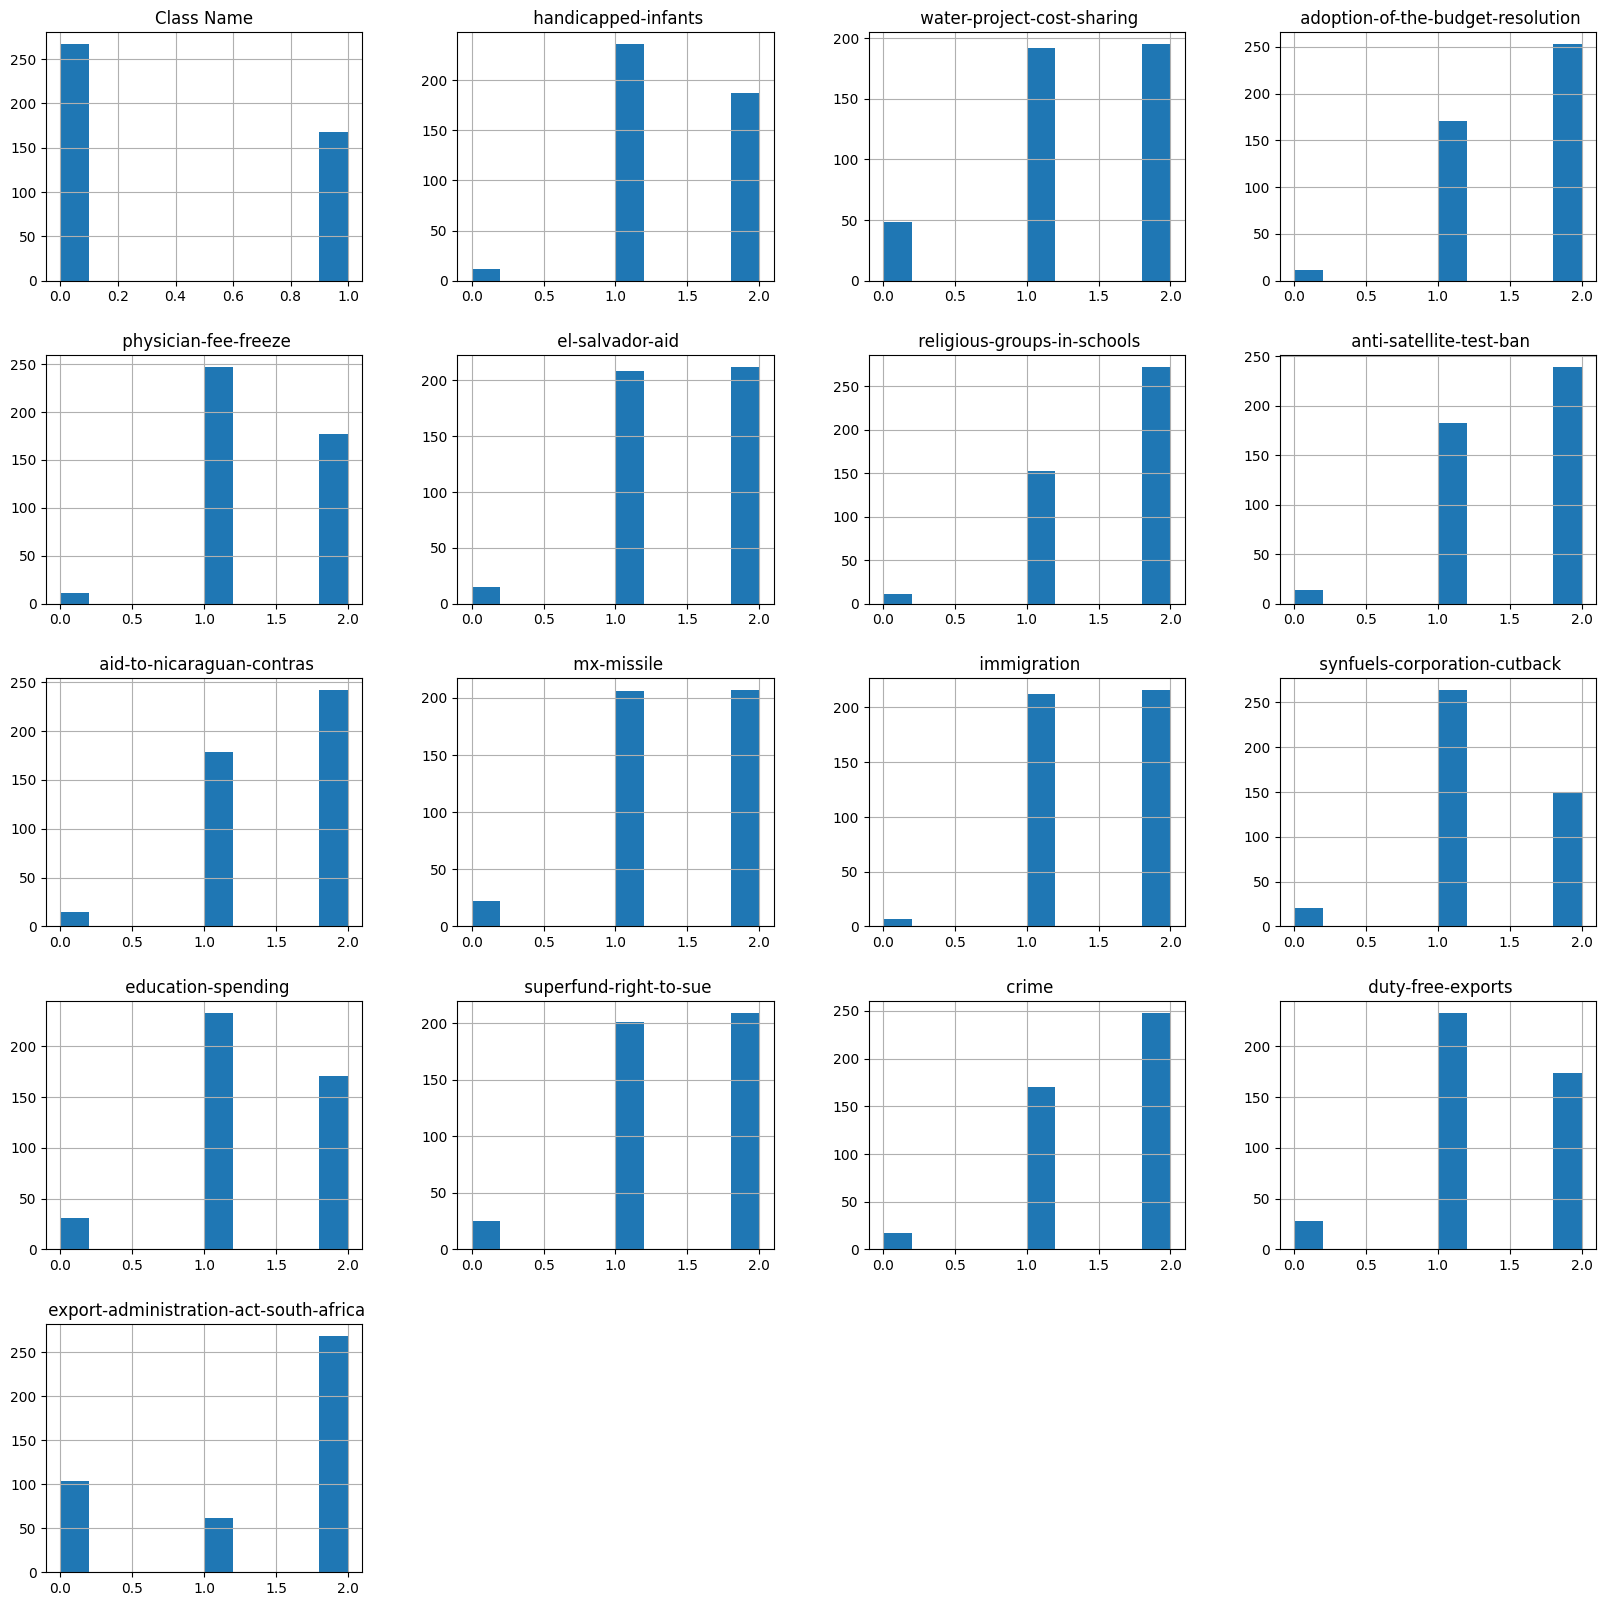

In [ ]:
df.iloc[:,:].hist(figsize=(20,20))
plt.show()

In [ ]:
x = df.drop('Class Name', axis=1).values
y = df['Class Name'].values

print(x.shape)
print(y.shape)

(435, 16)
(435,)


# **Model**

In [134]:
def build_and_eval_model(clf):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)

    model = clf

    scoring = ['accuracy', 'precision', 'recall', 'f1']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_validate(model, x_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores).iloc[:, 2:]

    print('A. Cross Validation on Training Set')
    print(cv_scores.describe())

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred)],
                                 'precision': [precision_score(y_test, y_pred)],
                                 'recall': [recall_score(y_test, y_pred)],
                                 'f1': [f1_score(y_test, y_pred)]})
    
    print('B. Final Validation on Test Set')
    print(final_scores.to_string(index=False))

    # Trực quan hóa kết quả đánh giá
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='none', cmap='Blues')
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')
    plt.xlabel("Cluster label")
    plt.ylabel("True label")
    plt.show()

    cv_scores.to_csv('/content/gdrive/MyDrive/NLU/MayHoc/Document/GiuaKi/_cv_scores.csv'.format(clf.__class__.__name__), index=False)
    final_scores.to_csv('/content/gdrive/MyDrive/NLU/MayHoc/Document/GiuaKi/_final_scores.csv'.format(clf.__class__.__name__), index=False)

# **K-mean**

BUILD AND EVALUATE k-MEANS MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.528834        0.423080     0.533333   0.471675
std         0.367483        0.366686     0.458605   0.407246
min         0.114754        0.000000     0.000000   0.000000
25%         0.156967        0.063508     0.085145   0.072727
50%         0.803279        0.689655     0.869565   0.769231
75%         0.866667        0.758621     0.956522   0.846154
max         0.885246        0.793103     1.000000   0.867925
B. Final Validation on Test Set
 accuracy  precision   recall      f1
  0.10687   0.041667 0.058824 0.04878


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



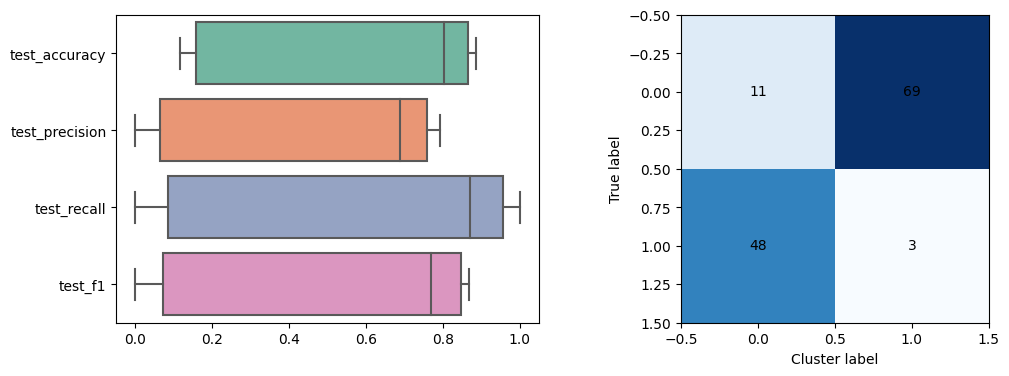

In [135]:
print('BUILD AND EVALUATE k-MEANS MODEL')
clf = KMeans(n_clusters=2, random_state=0)
build_and_eval_model(clf)

# **DecisionTreeClassifier**

A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.957268        0.920772     0.974396   0.946129
std         0.017277        0.032827     0.034826   0.021794
min         0.934426        0.857143     0.875000   0.913043
25%         0.942213        0.902778     0.956522   0.929624
50%         0.966667        0.920000     1.000000   0.956522
75%         0.967213        0.955534     1.000000   0.959167
max         0.983607        0.958333     1.000000   0.978723
B. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.946565   0.923077 0.941176 0.932039


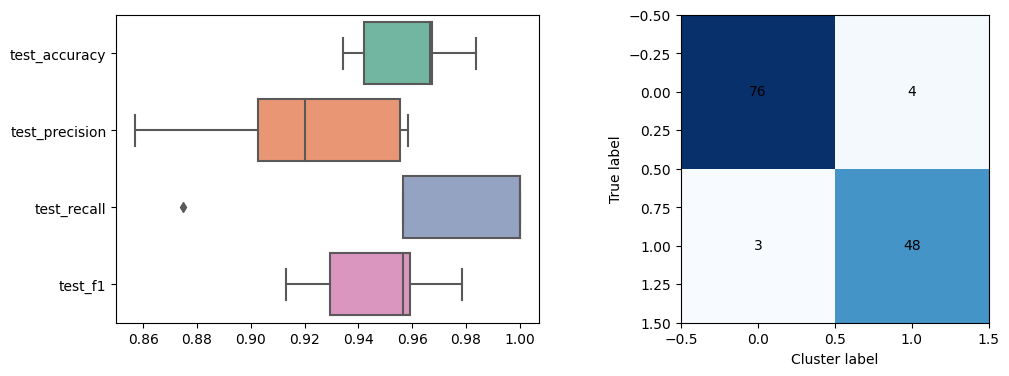

In [136]:
clf = DecisionTreeClassifier(min_samples_leaf=10,min_samples_split=17,random_state=1)
build_and_eval_model(clf)

# **GaussianNB**

A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.922204        0.871837     0.937440   0.902680
std         0.021778        0.037819     0.039082   0.027209
min         0.868852        0.777778     0.869565   0.840000
25%         0.917350        0.851852     0.913043   0.893617
50%         0.918033        0.875000     0.956522   0.901961
75%         0.934426        0.880000     0.958333   0.918333
max         0.966667        0.956522     1.000000   0.956522
B. Final Validation on Test Set
 accuracy  precision   recall    f1
 0.908397   0.933333 0.823529 0.875


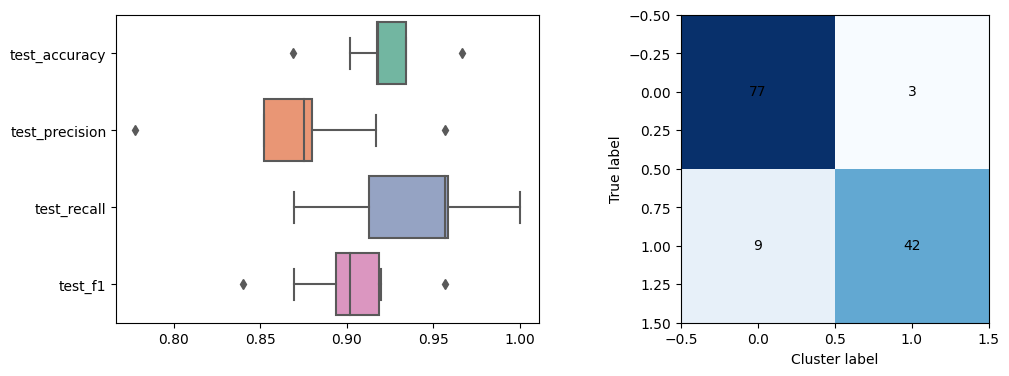

In [137]:
clf = GaussianNB()
build_and_eval_model(clf)

# **SVM**

In [138]:
# Using SVM
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf','linear']}

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, stratify= y, random_state=0)

svm_class = SVC(kernel='linear', random_state=0)

grid_svm_class = GridSearchCV(estimator=svm_class, param_grid= param_grid, scoring='accuracy', n_jobs=4, cv=10, refit=True, return_train_score=True)

grid_svm_class.fit(x_train,y_train)
y_pred = grid_svm_class.predict(x_test)

print(grid_svm_class.best_params_)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.9465648854961832
0.9425511197663097
0.9455882352941176
0.944006838859376


BUILD AND EVALUATE SVM MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.955082        0.915552     0.974275   0.943466
std         0.015710        0.029323     0.031484   0.019883
min         0.934426        0.857143     0.913043   0.913043
25%         0.942213        0.900966     0.956522   0.929624
50%         0.950820        0.920000     1.000000   0.941176
75%         0.967213        0.923077     1.000000   0.958333
max         0.983333        0.958333     1.000000   0.978723
B. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.946565   0.923077 0.941176 0.932039


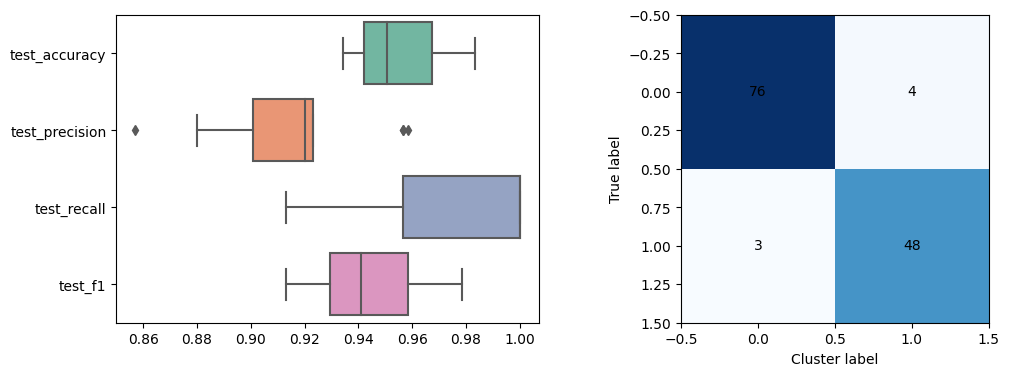

In [139]:
print('BUILD AND EVALUATE SVM MODEL')
clf = SVC(kernel='linear', random_state=0, C=0.1, gamma=1)
build_and_eval_model(svm)

# **RandomForestClassifier**

In [140]:
#RandomForest
param_grid = {
    'n_estimators': [25, 50, 100, 150,300,500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'criterion' :['gini', 'entropy']
}

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, stratify= y, random_state=0)

rf_class = RandomForestClassifier(random_state=0)

grid_rf_class = GridSearchCV(estimator=rf_class, param_grid= param_grid, scoring='accuracy', n_jobs=4, cv=10, refit=True, return_train_score=True)

grid_rf_class.fit(x_train,y_train)
y_pred = grid_rf_class.predict(x_test)

print(grid_rf_class.best_params_)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

{'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 6, 'n_estimators': 50}
0.9312977099236641
0.932605421686747
0.9224264705882352
0.9269380925822643


BUILD AND EVALUATE RANDOM FOREST MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.963825        0.929119     0.982729   0.954682
std         0.020719        0.039882     0.021899   0.024930
min         0.918033        0.827586     0.956522   0.905660
25%         0.958743        0.918333     0.956522   0.946346
50%         0.967213        0.956522     1.000000   0.958333
75%         0.983607        0.958333     1.000000   0.978723
max         0.983607        0.960000     1.000000   0.979592
B. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.931298     0.9375 0.882353 0.909091


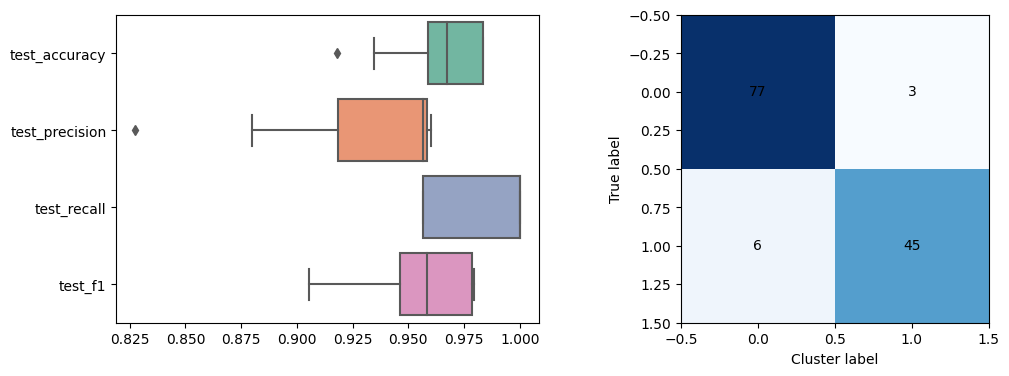

In [141]:
print('BUILD AND EVALUATE RANDOM FOREST MODEL')
clf = RandomForestClassifier(random_state=0, criterion='entropy', max_depth= 6, max_features= None, max_leaf_nodes= 6, n_estimators=50)
build_and_eval_model(clf)

# **K-nn**

In [142]:
#KNeighborsClassifier
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, stratify= y, random_state=0)

knn_class =  KNeighborsClassifier(n_neighbors = 10)

grid_knn_class = GridSearchCV(estimator=knn_class, param_grid= grid_params, scoring='accuracy', n_jobs=4, cv=10, refit=True, return_train_score=True)

grid_knn_class.fit(x_train,y_train)
y_pred = grid_knn_class.predict(x_test)

print(grid_knn_class.best_params_)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
0.9236641221374046
0.9177552007740687
0.9232843137254902
0.9202775073028238


BUILD AND EVALUATE k-NN MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.914517        0.848521     0.948792   0.895255
std         0.025620        0.042672     0.032969   0.030899
min         0.852459        0.750000     0.913043   0.823529
25%         0.909016        0.818122     0.916667   0.888980
50%         0.918033        0.851852     0.956522   0.897959
75%         0.925683        0.880000     0.958333   0.909314
max         0.950820        0.916667     1.000000   0.941176
B. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.923664   0.886792 0.921569 0.903846


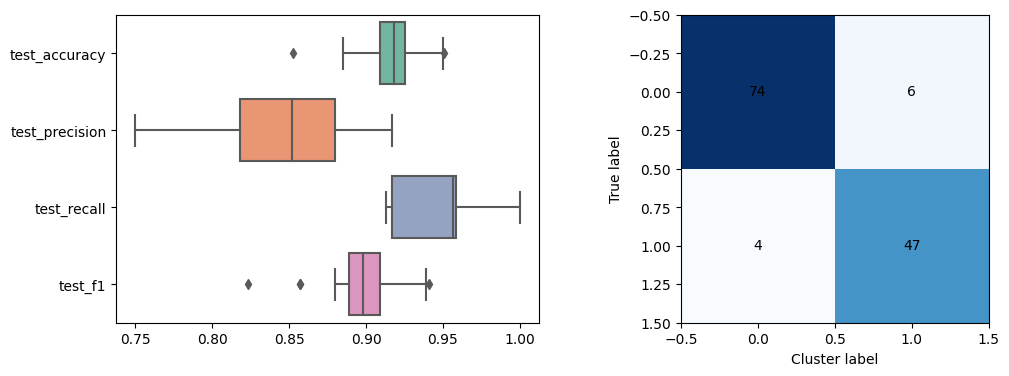

In [ ]:
print('BUILD AND EVALUATE k-NN MODEL')
clf = KNeighborsClassifier(metric='manhattan', n_neighbors= 11, weights= 'uniform')
build_and_eval_model(clf)

# **Neuron Network**

In [143]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, stratify= y, random_state=0)

neuron_class = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(250, 100), random_state=1)

grid_mpl_class = GridSearchCV(estimator= neuron_class, param_grid=parameter_space, scoring='accuracy', n_jobs=4, cv=10, refit=True, return_train_score=True)

grid_mpl_class.fit(x_train,y_train)
y_pred = grid_mpl_class.predict(x_test)

print(grid_mpl_class.best_params_)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.9312977099236641
0.9370843989769821
0.9188725490196079
0.9263355201499531


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



BUILD AND EVALUATE Neuron network MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.946321        0.935400     0.925845   0.929298
std         0.022657        0.033239     0.057216   0.031273
min         0.901639        0.884615     0.826087   0.869565
25%         0.934426        0.916667     0.913043   0.914855
50%         0.950820        0.920000     0.956522   0.936170
75%         0.950820        0.955534     0.957428   0.938776
max         1.000000        1.000000     1.000000   1.000000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



B. Final Validation on Test Set
 accuracy  precision   recall   f1
 0.938931   0.938776 0.901961 0.92


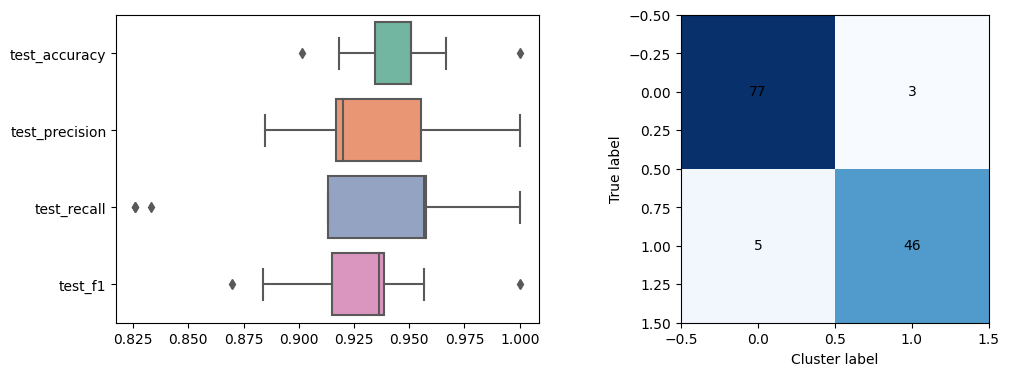

In [144]:
print('BUILD AND EVALUATE Neuron network MODEL')
clf =  MLPClassifier(activation='relu', alpha= 0.05, hidden_layer_sizes=(50, 100, 50), learning_rate='constant', solver= 'adam')
build_and_eval_model(clf)

# **Kết Luận**

In [145]:
clf_names = ['KMeans','DecisionTree','GaussianNB','SVM','RandomForestClassifier', 'KNeighborsClassifier','Neuron network']
score_names = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']

def build_plots(title):
    model_cv_scores = {clf_name: pd.read_csv('/content/gdrive/MyDrive/NLU/MayHoc/Document/GiuaKi/_cv_scores.csv'.format(clf_name)) for clf_name in clf_names}

    fig, axs = plt.subplots(2,2, figsize=(12,6))

    for score_name, ax in zip(score_names, axs.flat):
        score_data = pd.DataFrame({clf_name: model_cv_scores[clf_name][score_name] for clf_name in clf_names})
        sns.boxplot(data=score_data, orient="h", palette="Set2", ax=ax)
        ax.set_title(score_name)
    
    fig.suptitle(title)
    plt.tight_layout()

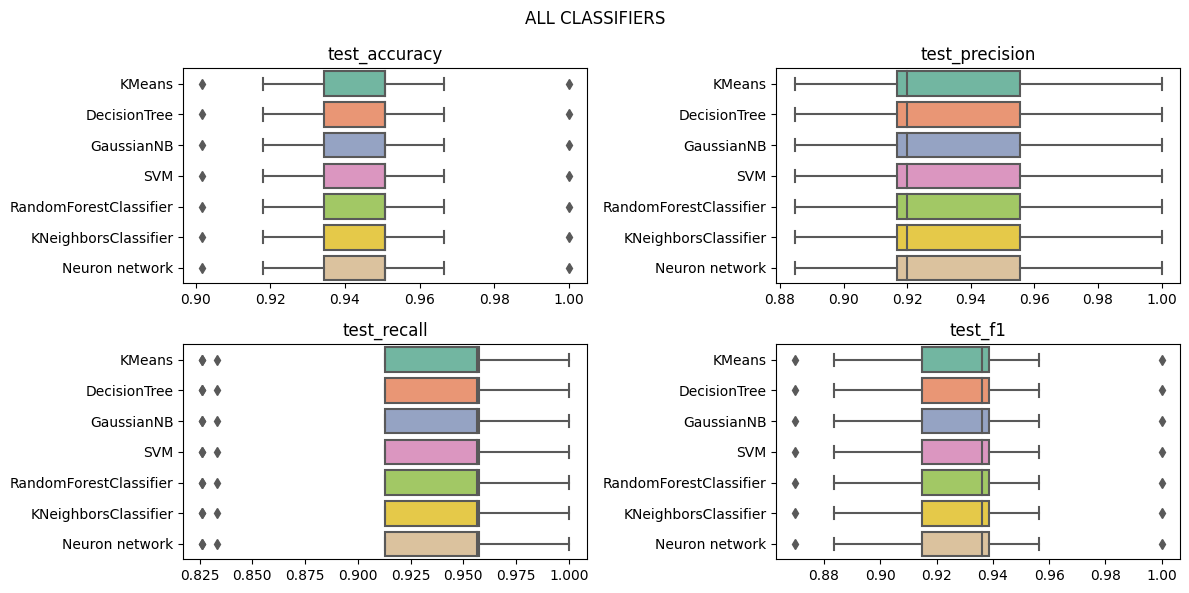

In [146]:
build_plots('ALL CLASSIFIERS')

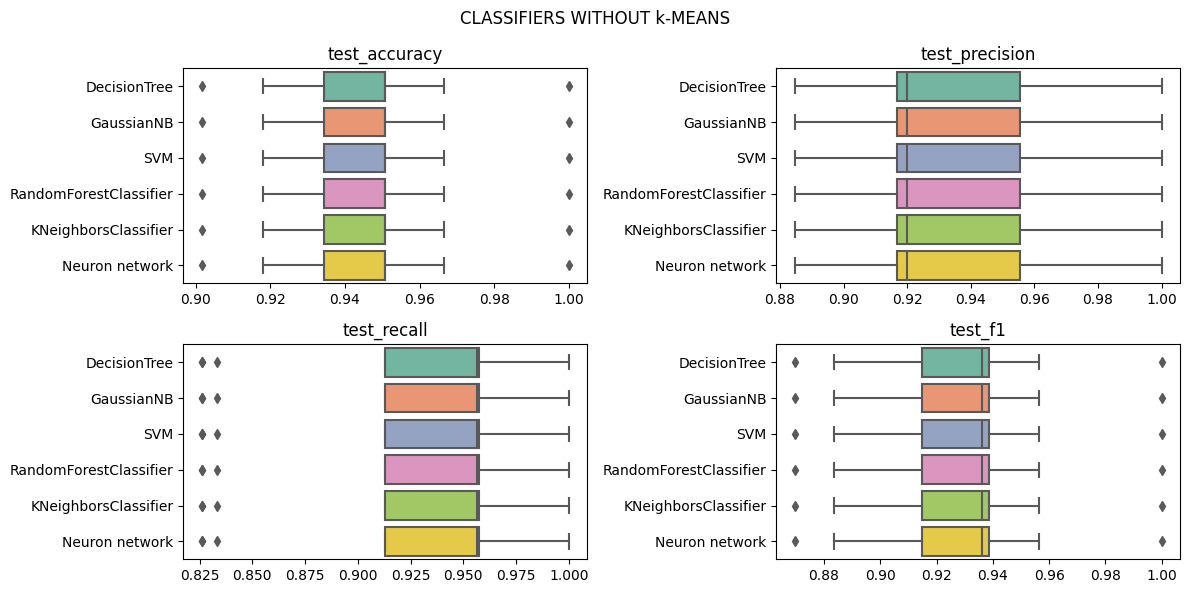

In [147]:
clf_names.remove('KMeans')
build_plots('CLASSIFIERS WITHOUT k-MEANS')